In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor


In [2]:
# Upload Excel file
file_path = "../data/processed/online/preprocessed.xlsx"
df = pd.read_excel(file_path)

# Remove columns without names
df = df.drop(columns=[col for col in df.columns if "Unnamed" in col])

# Select key columns
selected_columns = [
    'Gender', 'Education_Level', 'Age', 'Football_Experience',
    'Tourism_Experience', 'Peace_Concepts', 'Diplomacy_Agreement',
    'Stereotypes_Agreement'
]

In [3]:
# Calculate correlation
correlation_matrix = df[selected_columns].corr()

In [4]:
correlation_matrix

,Gender,Education_Level,Age,Football_Experience,Tourism_Experience,Peace_Concepts,Diplomacy_Agreement,Stereotypes_Agreement
Gender,1.000000,0.195992,-0.191643,-0.305932,-0.002430,-0.169004,0.185818,0.103770
Education_Level,0.195992,1.000000,0.213181,0.248246,-0.197748,-0.330185,-0.274874,-0.220020
Age,-0.191643,0.213181,1.000000,0.318731,0.529923,0.285047,-0.424207,-0.351780
Football_Experience,-0.305932,0.248246,0.318731,1.000000,0.371468,-0.146547,-0.229127,-0.548869
Tourism_Experience,-0.002430,-0.197748,0.529923,0.371468,1.000000,0.099884,0.052922,-0.370660
Peace_Concepts,-0.169004,-0.330185,0.285047,-0.146547,0.099884,1.000000,-0.294118,0.057496
Diplomacy_Agreement,0.185818,-0.274874,-0.424207,-0.229127,0.052922,-0.294118,1.000000,0.269952
Stereotypes_Agreement,0.103770,-0.220020,-0.351780,-0.548869,-0.370660,0.057496,0.269952,1.000000


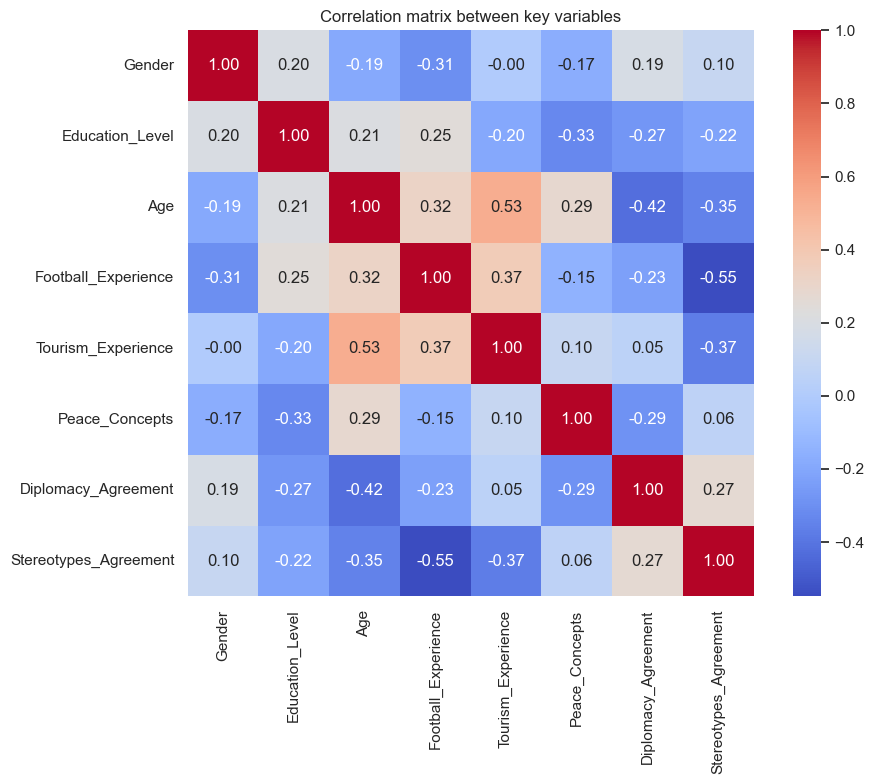

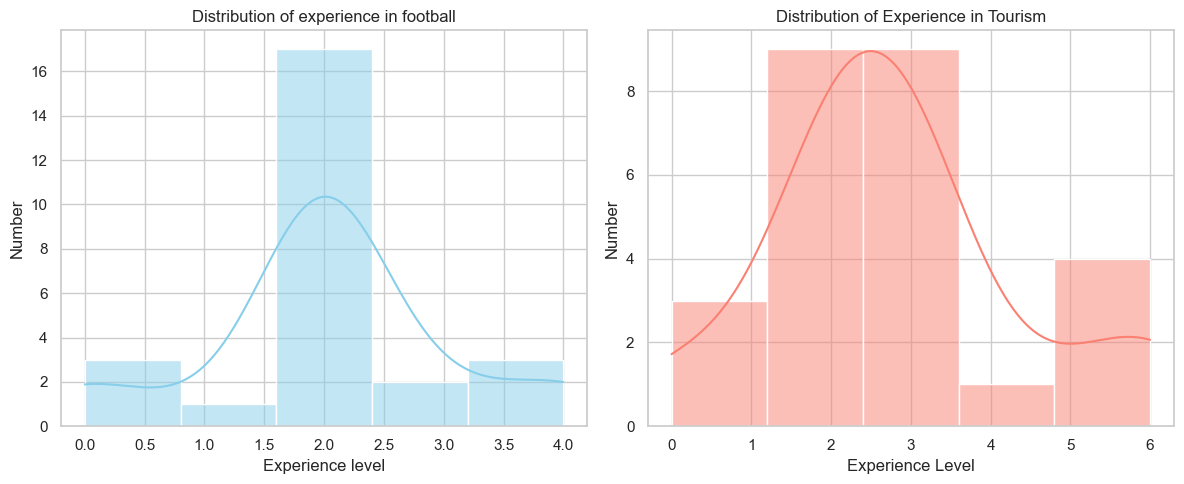

In [5]:
# Chart drawing settings
sns.set(style="whitegrid")
#plt.rcParams['font.family'] = 'DejaVu Sans'  # If you need Persian font, set this

# 📌 Chart 1: Correlation Matrixplt.figure(figsize=(18, 12))
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation matrix between key variables")
plt.tight_layout()
plt.show()

# 📌 Chart 2: Distribution of football and tourism experience
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df['Football_Experience'], bins=5, kde=True, color='skyblue')
plt.title("Distribution of experience in football")
plt.xlabel("Experience level")
plt.ylabel("Number")

plt.subplot(1, 2, 2)
sns.histplot(df['Tourism_Experience'], bins=5, kde=True, color='salmon')
plt.title("Distribution of Experience in Tourism")
plt.xlabel("Experience Level")
plt.ylabel("Number")

plt.tight_layout()
plt.show()

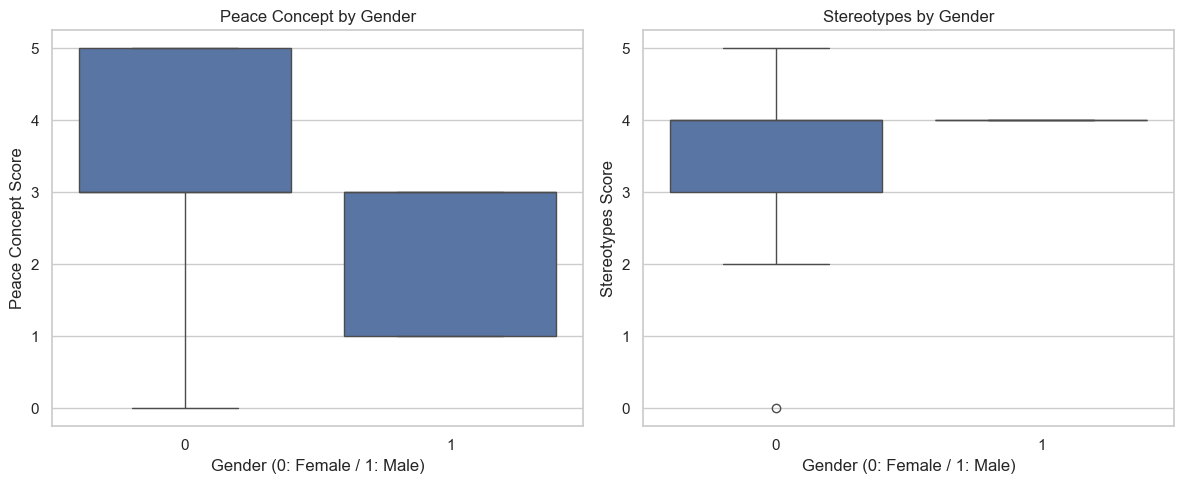

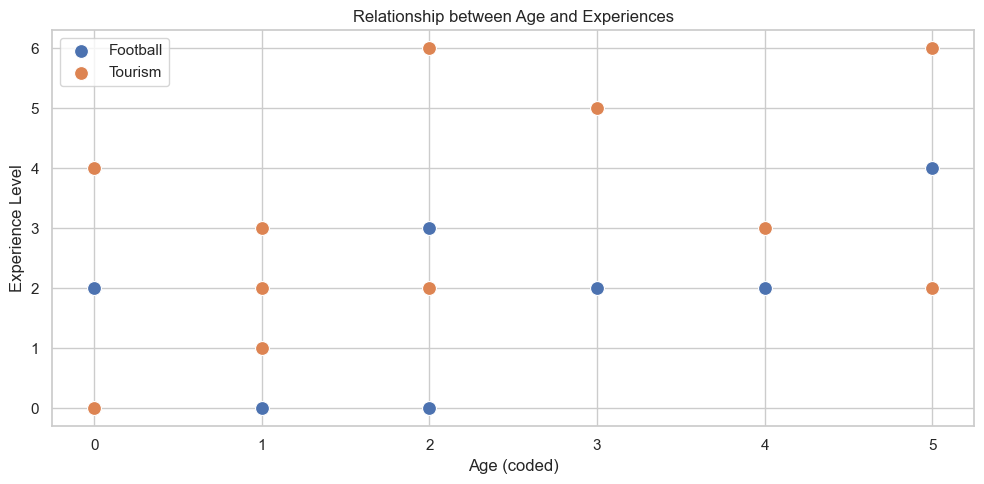

In [6]:
# 📌 Figure 3: Comparison of gender with the concept of peace and stereotypes
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Peace_Concepts', data=df)
plt.title("Peace Concept by Gender")
plt.xlabel("Gender (0: Female / 1: Male)")
plt.ylabel("Peace Concept Score")

plt.subplot(1, 2, 2)
sns.boxplot(x='Gender', y='Stereotypes_Agreement', data=df)
plt.title("Stereotypes by Gender")
plt.xlabel("Gender (0: Female / 1: Male)")
plt.ylabel("Stereotypes Score")

plt.tight_layout()
plt.show()

# 📌 Figure 4: Relationship between age and Experiences
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Age', y='Football_Experience', data=df, label='Football', s=100)
sns.scatterplot(x='Age', y='Tourism_Experience', data=df, label='Tourism', s=100)
plt.title("Relationship between Age and Experiences")
plt.xlabel("Age (coded)")
plt.ylabel("Experience Level")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

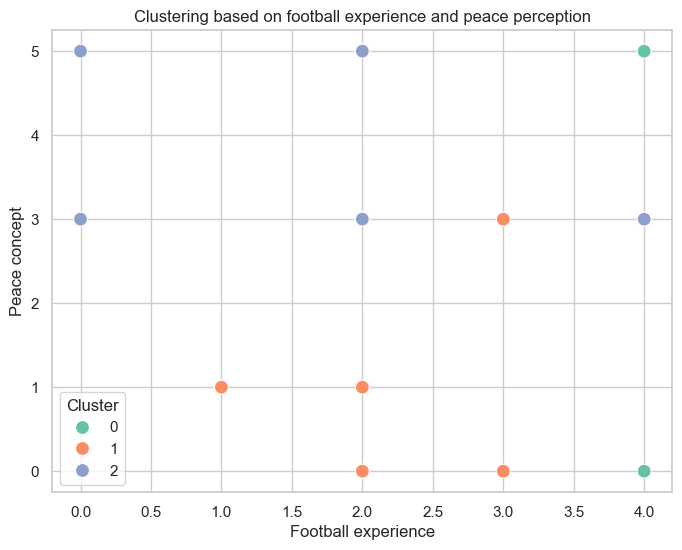

📊 Classification model performance report:

              precision    recall  f1-score   support

           0       0.67      0.67      0.67         3
           1       0.80      0.80      0.80         5

    accuracy                           0.75         8
   macro avg       0.73      0.73      0.73         8
weighted avg       0.75      0.75      0.75         8



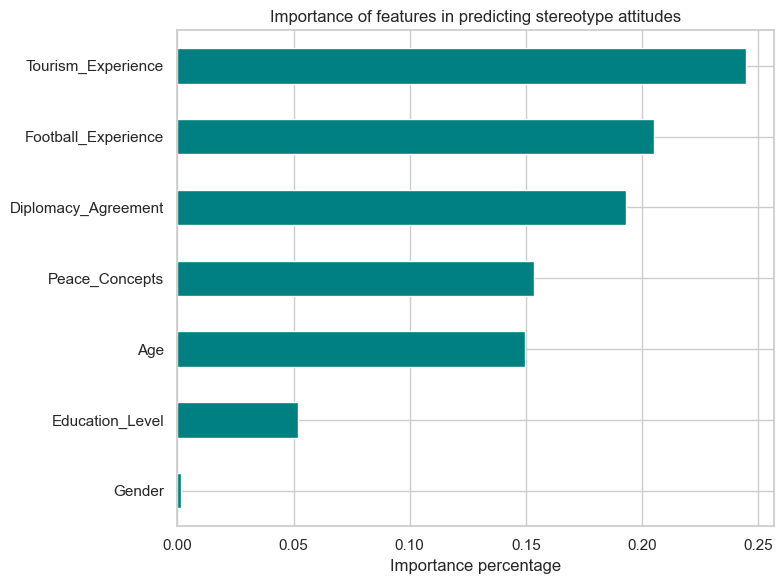

In [7]:
# Select key features for machine learning
features = [
'Gender', 'Education_Level', 'Age',
'Football_Experience', 'Tourism_Experience',
'Peace_Concepts', 'Diplomacy_Agreement', 'Stereotypes_Agreement'
]
df_ml = df[features].dropna()

# --- 📌 Analysis 1: KMeans clustering ---
X = df_ml.values
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_scaled)
df_ml['Cluster'] = clusters

# Plot the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=df_ml['Football_Experience'], y=df_ml['Peace_Concepts'],
hue=df_ml['Cluster'], palette='Set2', s=100)
plt.title("Clustering based on football experience and peace perception")
plt.xlabel("Football experience")
plt.ylabel("Peace concept")
plt.grid(True)
plt.show()

# --- 📌 Analysis 2: Classification with Random Forest ---
# Goal: Predict stereotype perception (above or below the mean)
target = (df_ml['Stereotypes_Agreement'] > df_ml['Stereotypes_Agreement'].mean()).astype(int)
features_rf = df_ml.drop(columns=['Stereotypes_Agreement', 'Cluster'])

X_train, X_test, y_train, y_test = train_test_split(features_rf, target, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Model results
y_pred = model.predict(X_test)
print("📊 Classification model performance report:\n")
print(classification_report(y_test, y_pred))

# Feature importance
importances = pd.Series(model.feature_importances_, index=features_rf.columns)
importances = importances.sort_values(ascending=True)

plt.figure(figsize=(8, 6))
importances.plot(kind='barh', color='teal')
plt.title("Importance of features in predicting stereotype attitudes")
plt.xlabel("Importance percentage")
plt.tight_layout()
plt.show()

In [37]:
def compare_models(df, target_column, related_columns, test_size=0.15, random_state=10):
    """
    Compare different machine learning models and return the best model based on MSE and R2 score.
    
    Parameters:
        df (pd.DataFrame): The dataset.
        target_column (str): Name of the target column to predict.
        related_columns (list): List of columns to combine into the target column.
        test_size (float): Proportion of the dataset to include in the test split.
        random_state (int): Random seed for reproducibility.
        
    Returns:
        best_model (sklearn model): The model with the best performance.
        results (dict): Performance metrics for all models.
    """
    # Step 1: Create the target column
    df["Combined_Target"] = df[related_columns].mean(axis=1)
    target = df["Combined_Target"]
    features = df.drop(columns=[target_column] + related_columns + ["Combined_Target"])
    
    # One-hot encode categorical features
    features = pd.get_dummies(features, drop_first=True)
    
    # Standardize numerical features
    scaler = StandardScaler()
    features = pd.DataFrame(scaler.fit_transform(features), columns=features.columns)
    
    # Step 2: Split the dataset
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=random_state)
    
    # Step 3: Define models
    models = {
        "Linear Regression": LinearRegression(),
        "Random Forest": RandomForestRegressor(n_estimators=100, random_state=random_state),
        "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=random_state),
        "XGBoost": XGBRegressor(n_estimators=100, random_state=random_state, objective='reg:squarederror')
    }
    
    # Step 4: Train and evaluate models
    results = {}
    best_model = None
    best_score = float('-inf')
    
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        
        results[name] = {"MSE": mse, "R2": r2}
        
        # Update the best model based on R2
        if r2 > best_score:
            best_score = r2
            best_model = model
    
    # Step 5: Display results
    print("Model Comparison:")
    for model_name, metrics in results.items():
        print(f"{model_name}: MSE = {metrics['MSE']:.2f}, R2 = {metrics['R2']:.2f}")
    
    # Step 6: Feature importance for tree-based models
    if hasattr(best_model, "feature_importances_"):
        feature_importances = pd.Series(best_model.feature_importances_, index=features.columns)
        feature_importances.nlargest(10).plot(kind='barh', figsize=(10, 6))
        plt.title("Top 10 Features Impacting Target")
        plt.show()


    print(feature_importances.nlargest(10))
    return best_model, results , feature_importances


In [38]:
df = pd.read_excel("../data/processed/online/preprocessed.xlsx")

In [39]:
df.columns

Index(['Unnamed: 0', 'Gender', 'Education_Level', 'Age', 'Job',
       'Football_Experience', 'Tourism_Experience', 'Peace_Concepts',
       'Diplomacy_Agreement', 'Stereotypes_Agreement',
       ...
       'Suggestions_football', 'Suggestions_in', 'Suggestions_international',
       'Suggestions_iran', 'Suggestions_of', 'Suggestions_sports',
       'Suggestions_the', 'Suggestions_tourism', 'Suggestions_with',
       'Suggestions_women'],
      dtype='object', length=150)

In [40]:
df.drop('Unnamed: 0', axis=1, inplace=True)

# Tourism

In [41]:
#  Combine tourism-related columns to create a target

tourism_columns = []
for column in df.columns:
    if "Tourism_Prosperity" in column:
        tourism_columns.append(column)

df["Tourism_Score"] = df[tourism_columns].mean(axis=1)  # Create the target column
        
    

In [42]:
#tourism_columns

Model Comparison:
Linear Regression: MSE = 0.54, R2 = -1.16
Random Forest: MSE = 0.14, R2 = 0.42
Gradient Boosting: MSE = 0.02, R2 = 0.91
XGBoost: MSE = 0.04, R2 = 0.84


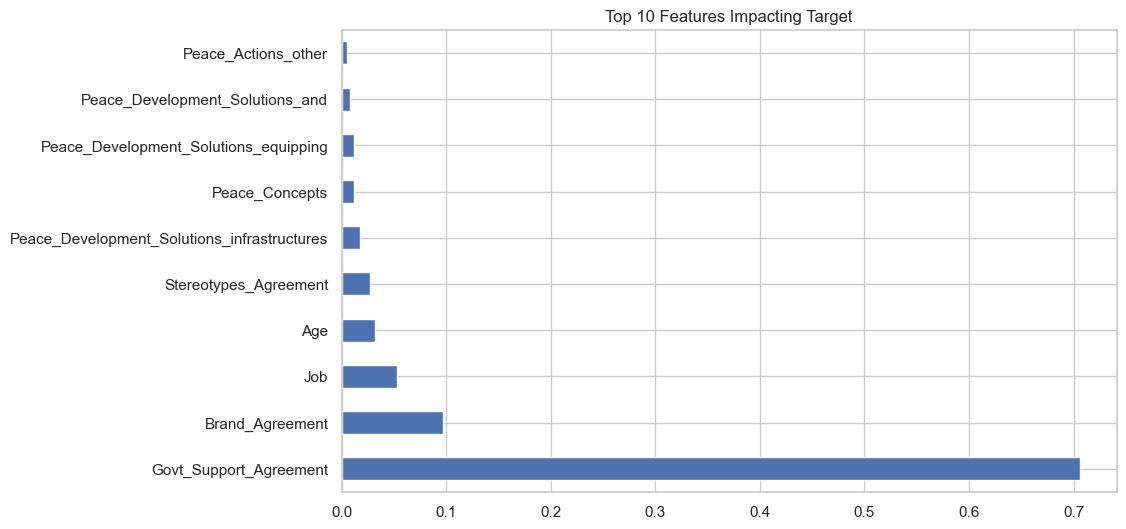

Govt_Support_Agreement                         0.705752
Brand_Agreement                                0.097140
Job                                            0.053119
Age                                            0.031900
Stereotypes_Agreement                          0.026976
Peace_Development_Solutions_infrastructures    0.017659
Peace_Concepts                                 0.012039
Peace_Development_Solutions_equipping          0.011682
Peace_Development_Solutions_and                0.008057
Peace_Actions_other                            0.005420
dtype: float64


In [44]:
best_model, model_results , feature_importances = compare_models(
    df=df,
    target_column = "Tourism_Score",
    related_columns = tourism_columns
)

In [45]:
best_model

GradientBoostingRegressor(random_state=10)

In [46]:
model_results

{'Linear Regression': {'MSE': np.float64(0.5398560081684114),
  'R2': -1.1594240326736456},
 'Random Forest': {'MSE': np.float64(0.14447500000000013),
  'R2': 0.4220999999999995},
 'Gradient Boosting': {'MSE': np.float64(0.022709925886044487),
  'R2': 0.9091602964558221},
 'XGBoost': {'MSE': np.float64(0.04104095973394806), 'R2': 0.8358361610642078}}

In [47]:
feature_importances_Tourism = pd.DataFrame(feature_importances)
feature_importances_Tourism.to_excel('../results/online/feature_importances_Tourism.xlsx')

# Peace

In [48]:

df = pd.read_excel("../data/processed/online/preprocessed.xlsx")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Gender', 'Education_Level', 'Age', 'Job', 'Football_Experience',
       'Tourism_Experience', 'Peace_Concepts', 'Diplomacy_Agreement',
       'Stereotypes_Agreement', 'Brand_Agreement',
       ...
       'Suggestions_football', 'Suggestions_in', 'Suggestions_international',
       'Suggestions_iran', 'Suggestions_of', 'Suggestions_sports',
       'Suggestions_the', 'Suggestions_tourism', 'Suggestions_with',
       'Suggestions_women'],
      dtype='object', length=149)

In [49]:
#  Combine Peace-related columns to create a target

Peace_columns = []
for column in df.columns:
    if "Peace_Development" in column or "national" in column or "games" in column:
        Peace_columns.append(column)

df["Peace_Score"] = df[Peace_columns].mean(axis=1)  # Create the target column

In [50]:
#Peace_columns

Model Comparison:
Linear Regression: MSE = 0.00, R2 = -1.47
Random Forest: MSE = 0.00, R2 = 0.26
Gradient Boosting: MSE = 0.00, R2 = -0.06
XGBoost: MSE = 0.00, R2 = -0.77


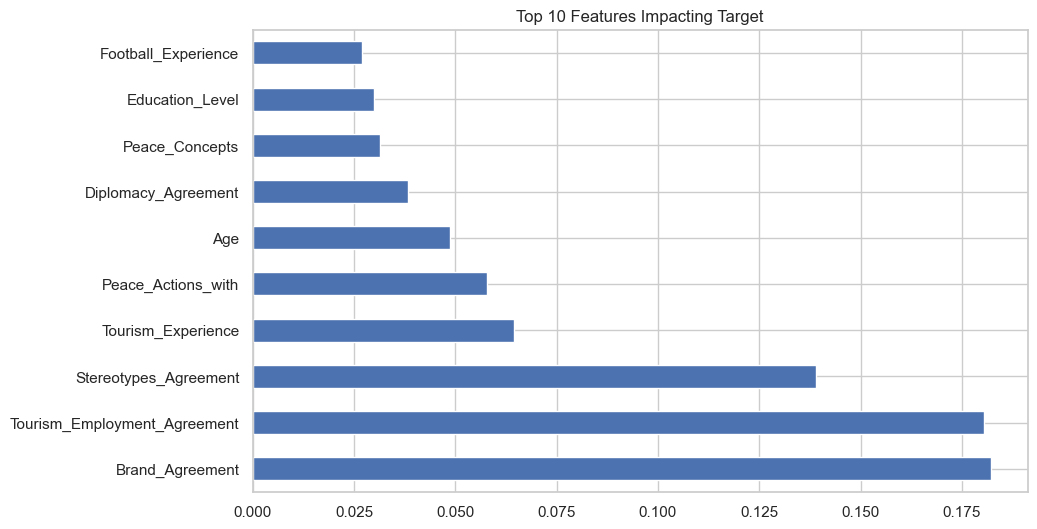

Brand_Agreement                 0.182139
Tourism_Employment_Agreement    0.180570
Stereotypes_Agreement           0.139034
Tourism_Experience              0.064412
Peace_Actions_with              0.057758
Age                             0.048586
Diplomacy_Agreement             0.038286
Peace_Concepts                  0.031467
Education_Level                 0.029970
Football_Experience             0.026942
dtype: float64


In [52]:
best_model, model_results , feature_importances = compare_models(
    df=df,
    target_column = "Peace_Score",
    related_columns = Peace_columns
)

In [53]:
best_model

RandomForestRegressor(random_state=10)

In [54]:
model_results

{'Linear Regression': {'MSE': np.float64(0.00039716463799622067),
  'R2': -1.465666135664161},
 'Random Forest': {'MSE': np.float64(0.00011911783863465654),
  'R2': 0.26049604426823236},
 'Gradient Boosting': {'MSE': np.float64(0.00017066770687988747),
  'R2': -0.05953437201325107},
 'XGBoost': {'MSE': np.float64(0.00028586888270799816),
  'R2': -0.7747230138348027}}

In [55]:
feature_importances_Peace = pd.DataFrame(feature_importances)
feature_importances_Peace.to_excel('../results/online/feature_importances_Peace.xlsx')

# Media

In [56]:
df = pd.read_excel("../data/processed/online/preprocessed.xlsx")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Gender', 'Education_Level', 'Age', 'Job', 'Football_Experience',
       'Tourism_Experience', 'Peace_Concepts', 'Diplomacy_Agreement',
       'Stereotypes_Agreement', 'Brand_Agreement',
       ...
       'Suggestions_football', 'Suggestions_in', 'Suggestions_international',
       'Suggestions_iran', 'Suggestions_of', 'Suggestions_sports',
       'Suggestions_the', 'Suggestions_tourism', 'Suggestions_with',
       'Suggestions_women'],
      dtype='object', length=149)

In [57]:
#  Combine Media-related columns to create a target

Media_columns = []
for column in df.columns:
    if "Promot" in column or "Media" in column:
        Media_columns.append(column)

df["Media_Score"] = df[Media_columns].mean(axis=1)  # Create the target column

Model Comparison:
Linear Regression: MSE = 0.00, R2 = -7.67
Random Forest: MSE = 0.00, R2 = -1.50
Gradient Boosting: MSE = 0.00, R2 = -1.34
XGBoost: MSE = 0.00, R2 = 0.65


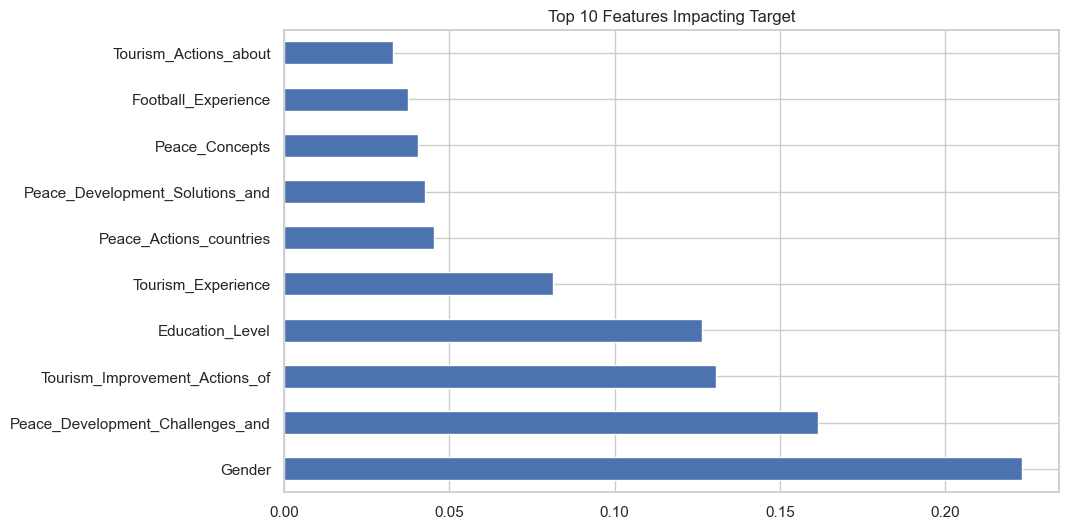

Gender                              0.223296
Peace_Development_Challenges_and    0.161430
Tourism_Improvement_Actions_of      0.130597
Education_Level                     0.126315
Tourism_Experience                  0.081326
Peace_Actions_countries             0.045263
Peace_Development_Solutions_and     0.042551
Peace_Concepts                      0.040447
Football_Experience                 0.037625
Tourism_Actions_about               0.032832
dtype: float32


In [59]:
best_model, model_results , feature_importances = compare_models(
    df=df,
    target_column = "Media_Score",
    related_columns = Media_columns
)

In [60]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [61]:
model_results

{'Linear Regression': {'MSE': np.float64(0.000900959310045836),
  'R2': -7.674930770657365},
 'Random Forest': {'MSE': np.float64(0.00025913892624316323),
  'R2': -1.4951318223545074},
 'Gradient Boosting': {'MSE': np.float64(0.00024331562055110475),
  'R2': -1.342776349792075},
 'XGBoost': {'MSE': np.float64(3.686887075357088e-05),
  'R2': 0.6450062751854244}}

In [62]:
feature_importances_Media = pd.DataFrame(feature_importances)
feature_importances_Media.to_excel('../results/online/feature_importances_Media.xlsx')

# Challenges


In [63]:
df = pd.read_excel("../data/processed/online/preprocessed.xlsx")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Gender', 'Education_Level', 'Age', 'Job', 'Football_Experience',
       'Tourism_Experience', 'Peace_Concepts', 'Diplomacy_Agreement',
       'Stereotypes_Agreement', 'Brand_Agreement',
       ...
       'Suggestions_football', 'Suggestions_in', 'Suggestions_international',
       'Suggestions_iran', 'Suggestions_of', 'Suggestions_sports',
       'Suggestions_the', 'Suggestions_tourism', 'Suggestions_with',
       'Suggestions_women'],
      dtype='object', length=149)

In [64]:
#  Combine Challenge-related columns to create a target

Challenge_columns = []
for column in df.columns:
    if "Challeng" in column:
        Challenge_columns.append(column)

df["Challenge_Score"] = df[Challenge_columns].mean(axis=1)  # Create the target column

Model Comparison:
Linear Regression: MSE = 0.00, R2 = -7.67
Random Forest: MSE = 0.00, R2 = -1.50
Gradient Boosting: MSE = 0.00, R2 = -1.34
XGBoost: MSE = 0.00, R2 = 0.65


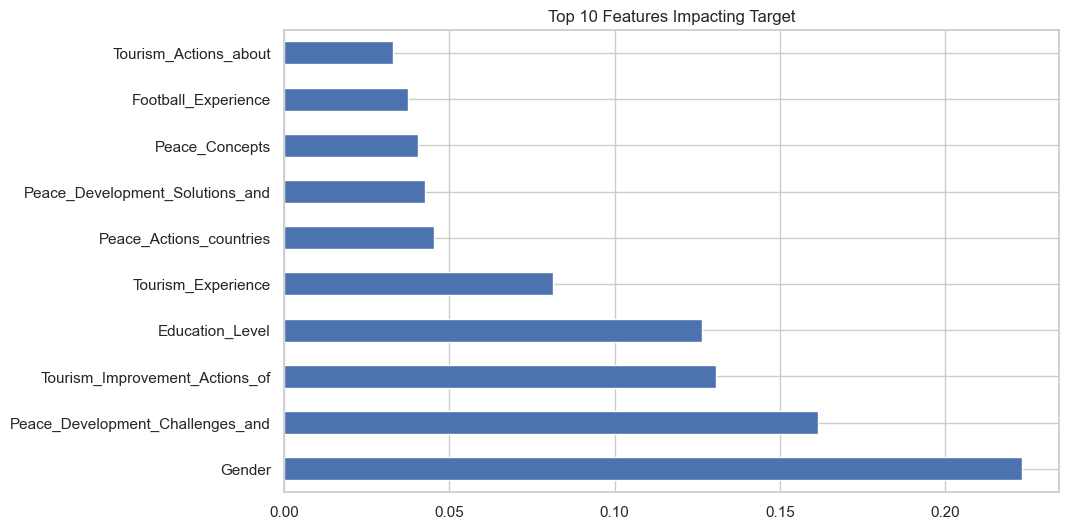

Gender                              0.223296
Peace_Development_Challenges_and    0.161430
Tourism_Improvement_Actions_of      0.130597
Education_Level                     0.126315
Tourism_Experience                  0.081326
Peace_Actions_countries             0.045263
Peace_Development_Solutions_and     0.042551
Peace_Concepts                      0.040447
Football_Experience                 0.037625
Tourism_Actions_about               0.032832
dtype: float32


In [66]:
best_model, model_results , feature_importances = compare_models(
    df=df,
    target_column = "Challenge_Score",
    related_columns = Media_columns
)

In [67]:
best_model

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=10, ...)

In [68]:
model_results

{'Linear Regression': {'MSE': np.float64(0.000900959310045836),
  'R2': -7.674930770657365},
 'Random Forest': {'MSE': np.float64(0.00025913892624316323),
  'R2': -1.4951318223545074},
 'Gradient Boosting': {'MSE': np.float64(0.00024331562055110475),
  'R2': -1.342776349792075},
 'XGBoost': {'MSE': np.float64(3.686887075357088e-05),
  'R2': 0.6450062751854244}}

In [69]:
feature_importances_Challenge = pd.DataFrame(feature_importances)
feature_importances_Challenge.to_excel('../results/online/feature_importances_Challenge.xlsx')

# Diplomacy

In [70]:
df = pd.read_excel("../data/processed/online/preprocessed.xlsx")
df.drop('Unnamed: 0', axis=1, inplace=True)
df.columns

Index(['Gender', 'Education_Level', 'Age', 'Job', 'Football_Experience',
       'Tourism_Experience', 'Peace_Concepts', 'Diplomacy_Agreement',
       'Stereotypes_Agreement', 'Brand_Agreement',
       ...
       'Suggestions_football', 'Suggestions_in', 'Suggestions_international',
       'Suggestions_iran', 'Suggestions_of', 'Suggestions_sports',
       'Suggestions_the', 'Suggestions_tourism', 'Suggestions_with',
       'Suggestions_women'],
      dtype='object', length=149)

In [71]:
#  Combine Challenge-related columns to create a target

Diplomacy_columns = []
for column in df.columns:
    if "diploma" in column or "Govt" in column   or "national" in column:
        Diplomacy_columns.append(column)

df["Diplomacy_Score"] = df[Diplomacy_columns].mean(axis=1)  # Create the target column

Model Comparison:
Linear Regression: MSE = 0.13, R2 = -3.27
Random Forest: MSE = 0.02, R2 = 0.24
Gradient Boosting: MSE = 0.02, R2 = 0.41
XGBoost: MSE = 0.03, R2 = 0.10


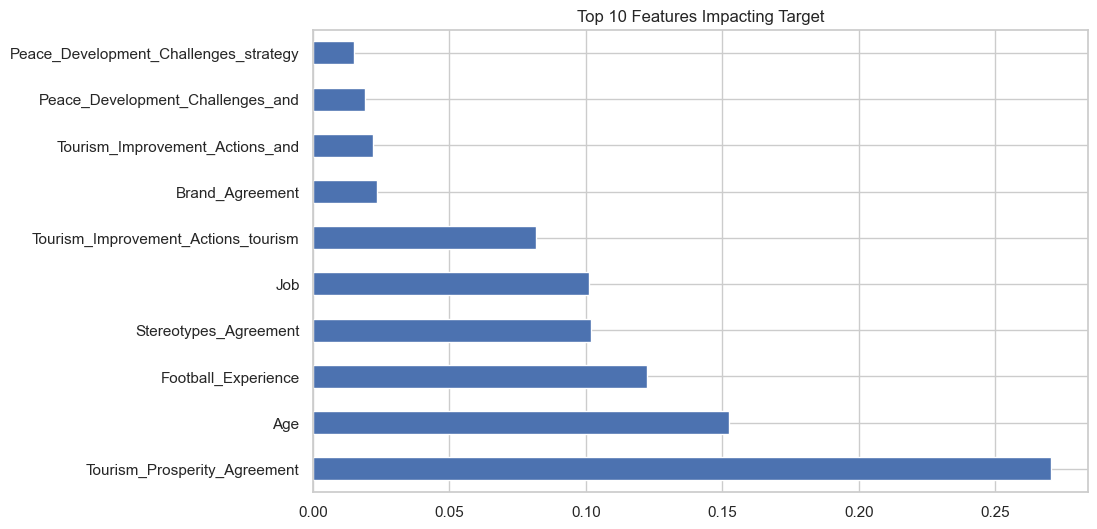

Tourism_Prosperity_Agreement             0.270318
Age                                      0.152424
Football_Experience                      0.122261
Stereotypes_Agreement                    0.102040
Job                                      0.101241
Tourism_Improvement_Actions_tourism      0.081885
Brand_Agreement                          0.023559
Tourism_Improvement_Actions_and          0.022175
Peace_Development_Challenges_and         0.019056
Peace_Development_Challenges_strategy    0.015061
dtype: float64


In [73]:
best_model, model_results , feature_importances = compare_models(
    df=df,
    target_column = "Diplomacy_Score",
    related_columns = Diplomacy_columns
)

In [74]:
best_model

GradientBoostingRegressor(random_state=10)

In [75]:
model_results

{'Linear Regression': {'MSE': np.float64(0.13335431805119674),
  'R2': -3.267338177638294},
 'Random Forest': {'MSE': np.float64(0.023644478494085876),
  'R2': 0.2433766881892523},
 'Gradient Boosting': {'MSE': np.float64(0.018584983893035843),
  'R2': 0.40528051542285326},
 'XGBoost': {'MSE': np.float64(0.028011722264127886),
  'R2': 0.1036248875479081}}